# Modelagem de tópicos com CTM/ETM/LDA no *Reddit* em português

Os testes a seguir foram realizados com o *corpus* em português de submissões do *Reddit* relacionadas à depressão.

3390 documentos de submissões foram utilizados para realização dos treinamentos dos modelos aqui avaliados. O conjunto foi coletado a partir do uso da API Pushshift e da biblioteca PRAW, e compreende postagens do período de 2008 a 2021 realizadas nos subreddits "desabafos" e "brasil". Como tais subreddits não são específicos ao tema de interesse - depressão - foi necessária uma busca mediada pelo uso de palavras-chave. Desta forma, o objetivo era delimitar as postagens a serem coletadas, de forma que apenas conteúdo relacionado a discussões sobre depressão fosse armazenado.

As seguintes palavras-chave foram usadas na coleta:
* "depressão"
* "suicídio"
* "diagnóstico depressão"
* "tratamento depressão"


Em seguida, uma extensa etapa de pré-processamento do dataset e de preparação das entradas para cada um dos modelos foi realizada. As etapas de pré-processamento textual realizadas foram as seguintes, na ordem de listagem:

* remoção de postagens vazias ou removidas (texto == 'removed' ou 'deleted')
* remoção de \n e aspas simples
* tokenização de documentos
* lematização de documentos
* remoção de categorias de part-of-speech diferentes de substantivos
* remoção de stopwords
* remoção de termos infrequentes ou muito frequentes em documentos (freq. mín. = 1%, freq. máx. = 80%)

Para as análises a seguir baseadas em embeddings de palavras, os embeddings word2vec empregados no treinamento dos modelos ETM foram reutilizados. Esses embeddings são oriundos do projeto [Wikipedia2Vec](https://wikipedia2vec.github.io/wikipedia2vec/pretrained/).

### Importações e configurações de ambiente

In [4]:
%load_ext autoreload
%autoreload 2

from utils.plots import plot_wordcloud, plot_graph, plot_wordcloud_by_word_probability, plot_pie_chart, plot_coherence_by_k_graph
from utils.topics import get_word_probability_mappings, get_average_topics_vectors, get_most_similar_terms_to_topic
from utils.linguistic_inquiry_word_count import get_categories_for_word
import sys, time, json, os, joblib, numpy as np, pandas as pd, ast
pd.options.display.max_colwidth = 100
from utils.notebook import create_dataframe_from_topics, get_topic_word_probability_pairs
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

pyLDAvis.enable_notebook()

WORKDIR = os.getcwd()
EMBEDDINGS_PATH = f'{WORKDIR}/../../embeddings/'
MODELS_PATH = f'{WORKDIR}/models/'
CSVS_PATH = f'{WORKDIR}/csvs/'
RESOURCES_PATH = f'{WORKDIR}/resources/'
WORDS_PER_TOPIC = 10

# Arquivos
ORIGINAL_DATASET = f'{WORKDIR}/../../datasets/original/brasil_desabafos_2008_2021/reddit-posts-gatherer-pt.submissions_[without_duplicates].json'
PREPROCESSED_DATASET = f'{WORKDIR}/../../datasets/processed/TEST_lemmatized_nouns_only/lemmatized_nouns_only_pt[processed].json'
ORIGINAL_EMBEDDINGS = f'{EMBEDDINGS_PATH}ptwiki_20180420_300d.txt'
OPTIMIZED_EMBEDDINGS = f'{EMBEDDINGS_PATH}optimized/ptwiki_20180420_300d.w2v'
WORD_LEMMA_MAPPING = f'{WORKDIR}/../../datasets/processed/TEST_lemmatized_nouns_only/lemmatized_nouns_only_pt[word_lemma_maps].json'
LIWC_DICTIONARY = f'{WORKDIR}/../../liwc/LIWC2007_Portugues_win.dic'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Informações do dataset

In [5]:
original_data = json.load(open(ORIGINAL_DATASET, 'r'))
print(f'Tamanho do dataset original (sem duplicatas): {len(original_data)}')
preprocessed_data = json.load(open(PREPROCESSED_DATASET, 'r'))
print(f'Tamanho do dataset após pré-processamento: {len(preprocessed_data)}')

Tamanho do dataset original (sem duplicatas): 3404
Tamanho do dataset após pré-processamento: 3390


### Resultados dos treinamentos de cada tipo de modelo

Nesta seção, avaliaremos os modelos CTM, ETM e LDA com maior valor para métrica de coerência quanto aos tópicos gerados pelos mesmos. A métrica de coerência NPMI é calculada após o treinamento de cada modelo, e emprega o dataset de teste para tal. 

Nesta seção, também será realizada a rotulação manual dos tópicos com significado mais claro.

As nuvens de palavras de cada tópico levam em consideração a probabilidade de cada palavra no seu respectivo tópico. Apenas as 10 palavras mais importantes de cada tópico serão usadas para as visualizações a seguir.

Na listagem dos modelos pelo total de coerência, apenas os 5 primeiros modelos serão exibidos.

#### CTM

Os modelos CTM tiveram resultados semelhantes entre si na métrica de coerência NPMI. O melhor colocado foi o CTM com 22 tópicos, portanto este será analisado abaixo.

In [6]:
ctm_results = pd.read_csv(CSVS_PATH + "ctm_combined_results.csv")
ctm_results_by_coherence = ctm_results.sort_values(["c_npmi_test"], ascending=(False))
ctm_results_by_coherence.head()

,Unnamed: 0,k,model,c_npmi_train,c_npmi_test,diversity,path
7,7,22.0,ctm_k22_combined,-0.099501,-0.200927,0.427273,ctm/ctm_k22_combined
5,5,18.0,ctm_k18_combined,-0.087841,-0.202085,0.444444,ctm/ctm_k18_combined
4,4,15.0,ctm_k15_combined,-0.109660,-0.205034,0.460000,ctm/ctm_k15_combined
3,3,12.0,ctm_k12_combined,-0.102146,-0.208341,0.562500,ctm/ctm_k12_combined
8,8,25.0,ctm_k25_combined,-0.082962,-0.210306,0.410000,ctm/ctm_k25_combined


Tópico 1: 


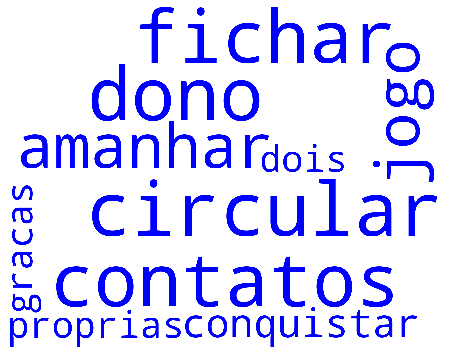

Tópico 2: 


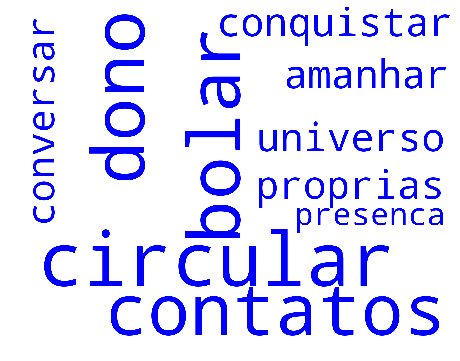

Tópico 3: 


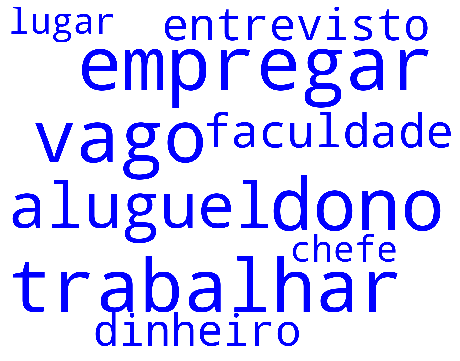

Tópico 4: 


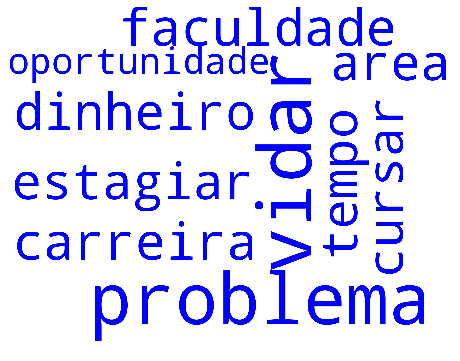

Tópico 5: 


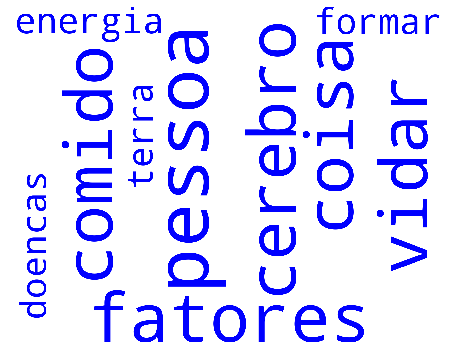

Tópico 6: 


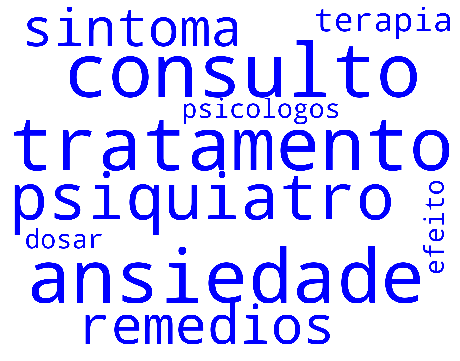

Tópico 7: 


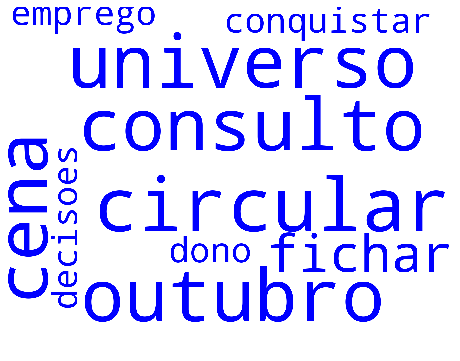

Tópico 8: 


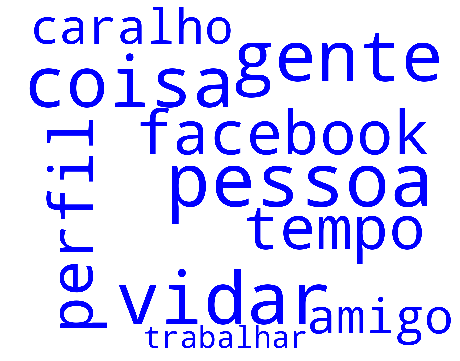

Tópico 9: 


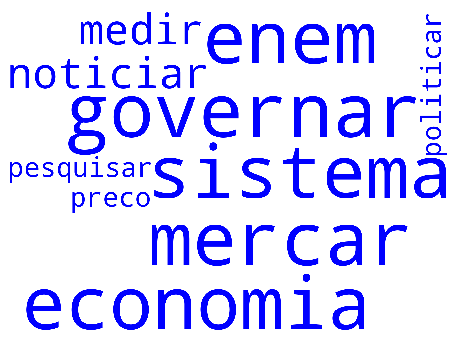

Tópico 10: 


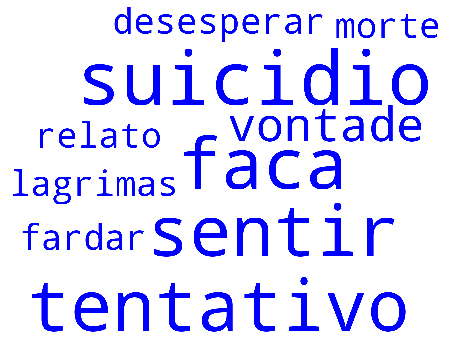

Tópico 11: 


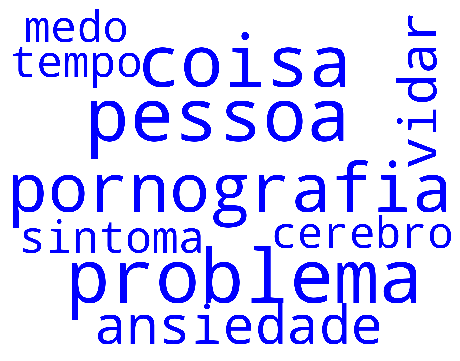

Tópico 12: 


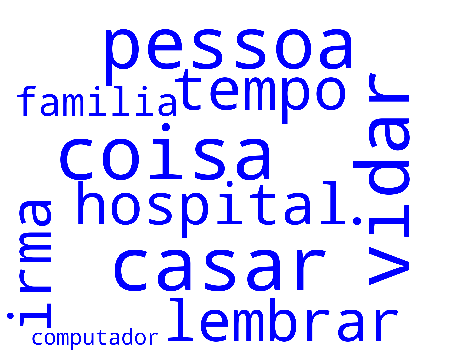

Tópico 13: 


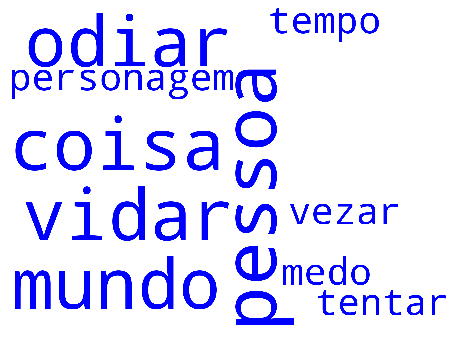

Tópico 14: 


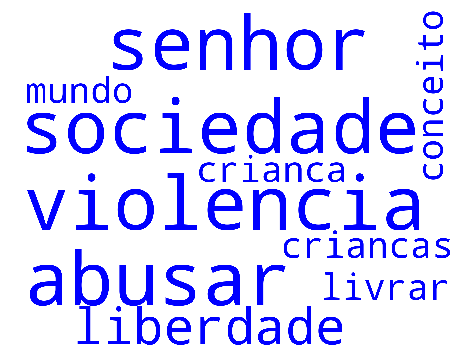

Tópico 15: 


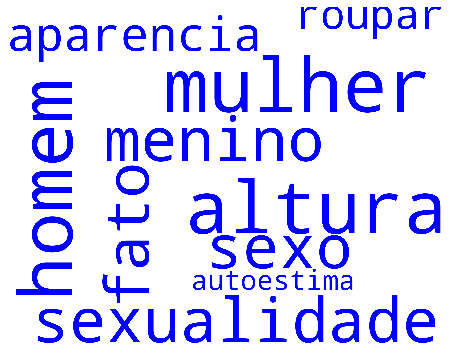

Tópico 16: 


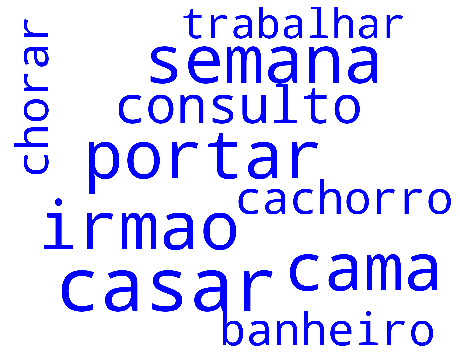

Tópico 17: 


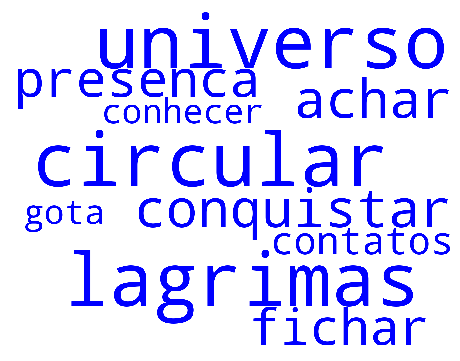

Tópico 18: 


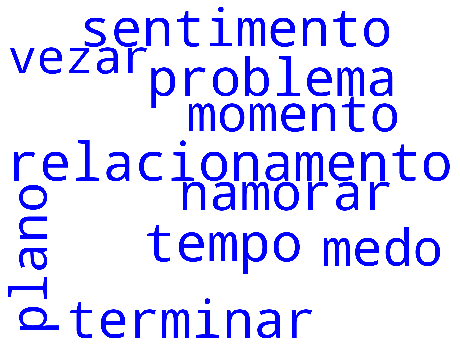

Tópico 19: 


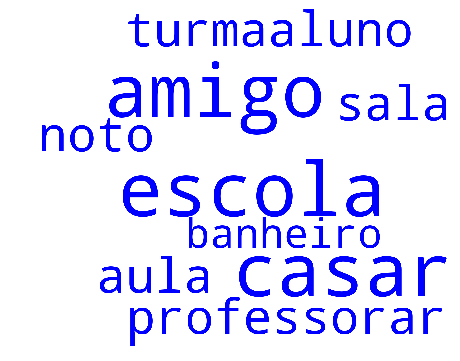

Tópico 20: 


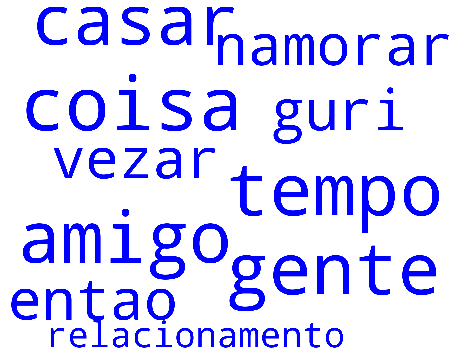

Tópico 21: 


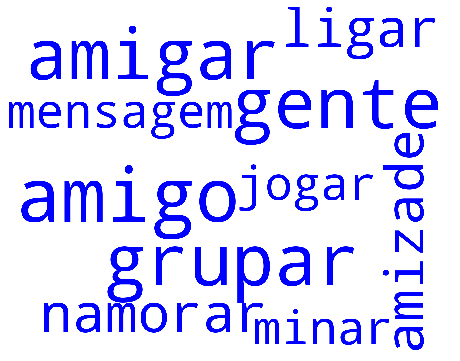

Tópico 22: 


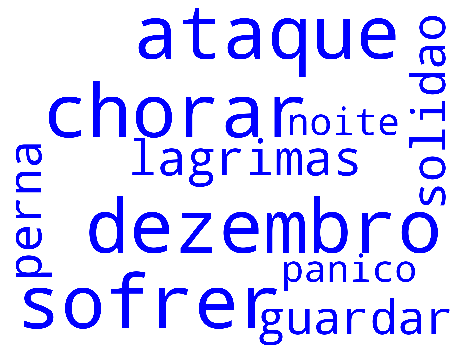

In [7]:
ctm_best_model_path = ctm_results_by_coherence['path'].tolist()[0]
ctm1 = joblib.load(os.path.join(MODELS_PATH, ctm_best_model_path))

ctm_topics_probs = [topic[:WORDS_PER_TOPIC] for topic in ctm1['topics_with_word_probs']]
ctm_mapping = get_word_probability_mappings(ctm_topics_probs)
for idx, mapping in enumerate(ctm_mapping):
    print(f'Tópico {idx+1}: ')
    plot_wordcloud_by_word_probability(ctm_mapping[idx], 'blue')

##### Rótulos possíveis para os tópicos:

Tópico 1: <br>
2: <br>
3: vida profissional<br>
4: vida profissional<br>
5: <br>
6: acompanhamento psiquiátrico<br>
7: <br>
8: <br>
9: <br>
10: angústia emocional<br>
11: <br>
12: <br>
13: <br>
14: <br>
15: identidade de gênero<br>
16: <br>
17: <br>
18: relacionamentos interperssoais<br>
19: ambiente estudantil<br>
20: <br>
21: amizade/relacionamentos interperssoais<br>
22: angústia emocional<br>

#### ETM

De forma geral, os modelos ETM tiveram resultados superiores aos modelos CTM e resultados similares aos modelos LDA quanto à métrica de coerência. O modelo ETM com melhor resultado foi aquele com 5 tópicos.

In [8]:
etm_results = pd.read_csv(CSVS_PATH + "etm_results.csv")
etm_results_by_coherence = etm_results.sort_values(["c_npmi_test"], ascending=(False))
etm_results_by_coherence.head()

,Unnamed: 0,k,model,c_npmi_train,c_npmi_test,diversity,path
0,0,5.0,etm_k5,-0.008190,-0.022510,0.680000,etm/etm_k5
1,1,8.0,etm_k8,0.000802,-0.033373,0.631250,etm/etm_k8
2,2,10.0,etm_k10,0.000798,-0.048735,0.655000,etm/etm_k10
3,3,12.0,etm_k12,-0.000628,-0.051155,0.579167,etm/etm_k12
4,4,15.0,etm_k15,0.002552,-0.057032,0.550000,etm/etm_k15


Tópico 1: 


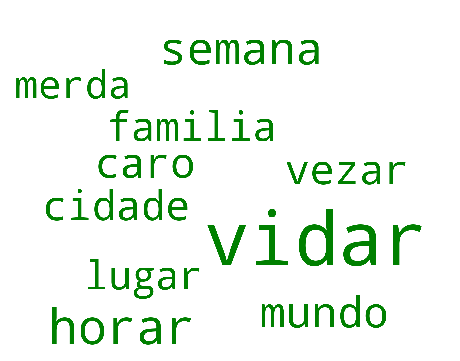

Tópico 2: 


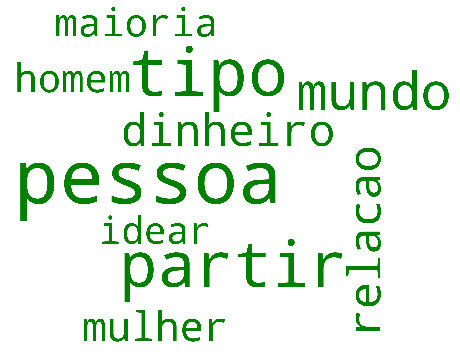

Tópico 3: 


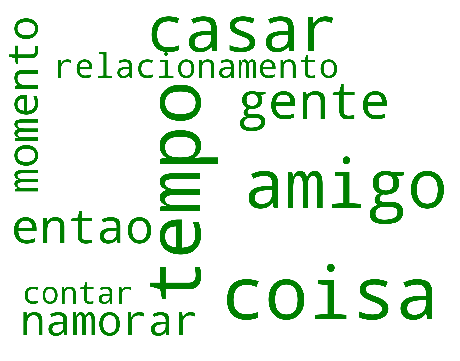

Tópico 4: 


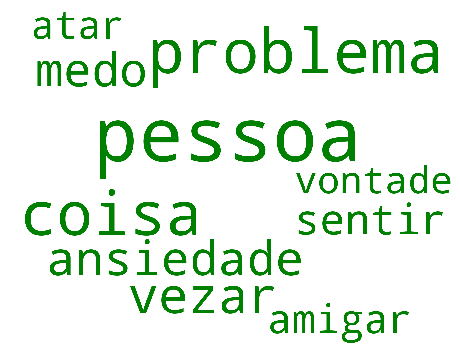

Tópico 5: 


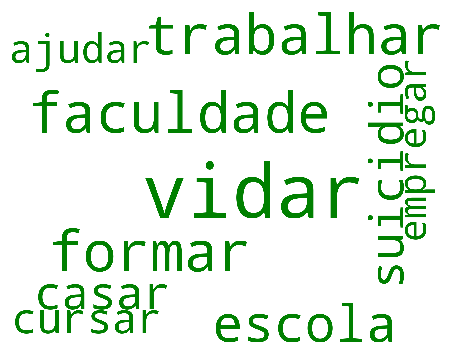

In [9]:
etm_best_model_path = etm_results_by_coherence['path'].tolist()[0]
etm1 = joblib.load(os.path.join(MODELS_PATH, etm_best_model_path))

etm_topics_probs = [topic[:WORDS_PER_TOPIC] for topic in etm1['topics_with_word_probs']]
etm_mapping = get_word_probability_mappings(etm_topics_probs)
for idx, mapping in enumerate(etm_mapping):
    print(f'Tópico {idx+1}: ')
    plot_wordcloud_by_word_probability(etm_mapping[idx], 'green')

##### Rótulos possíveis para os tópicos:

Tópico 1: <br>
2: <br>
3: relacionamentos<br>
4: instrospecção<br>
5: vida estudantil<br>

#### LDA

Os modelos LDA tiveram resultados semelhantes em termos de coerência àqueles obtidos pelos modelos ETM, sendo ligeiramente melhores que estes quando K=5 tópicos. Ainda, os modelos LDA tiveram melhores resultados em todos os cenários em relação aos modelos CTM.

In [10]:
lda_results = pd.read_csv(CSVS_PATH + "lda_results.csv")
lda_results_by_coherence = lda_results.sort_values(["c_npmi_test"], ascending=(False))
lda_results_by_coherence

,Unnamed: 0,k,model,c_npmi_train,c_npmi_test,diversity,path
0,0,5.0,lda_k5,0.012869,-0.012661,0.510000,lda/lda_k5
1,1,8.0,lda_k8,-0.002652,-0.057314,0.512500,lda/lda_k8
2,2,10.0,lda_k10,-0.005025,-0.071071,0.520000,lda/lda_k10
3,3,12.0,lda_k12,-0.023933,-0.095921,0.550000,lda/lda_k12
4,4,15.0,lda_k15,-0.041205,-0.106542,0.510000,lda/lda_k15
6,6,20.0,lda_k20,-0.037822,-0.117340,0.432500,lda/lda_k20
5,5,18.0,lda_k18,-0.040705,-0.119205,0.480556,lda/lda_k18
7,7,22.0,lda_k22,-0.045415,-0.130404,0.479545,lda/lda_k22
8,8,25.0,lda_k25,-0.053284,-0.141301,0.502000,lda/lda_k25
9,9,28.0,lda_k28,-0.052464,-0.142966,0.410714,lda/lda_k28


Tópico 1: 


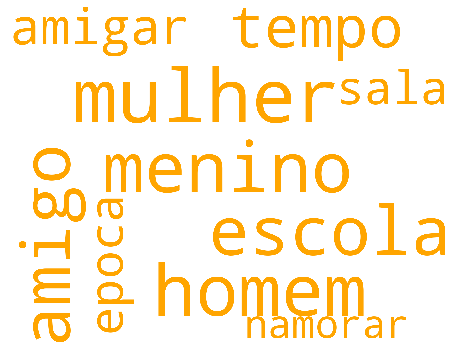

Tópico 2: 


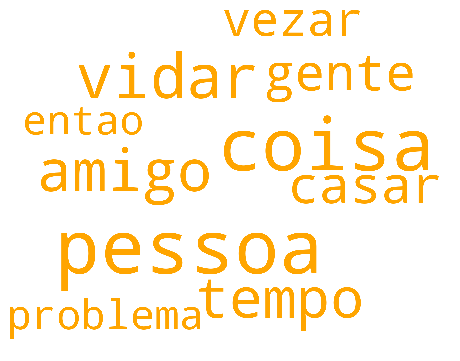

Tópico 3: 


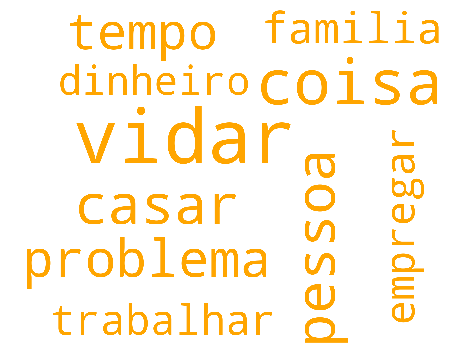

Tópico 4: 


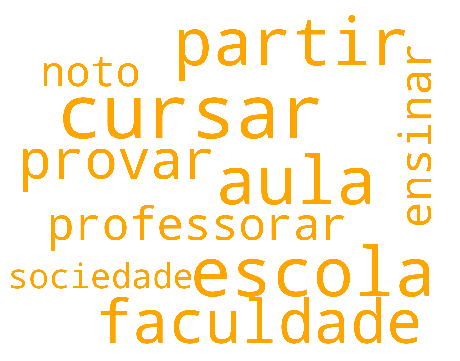

Tópico 5: 


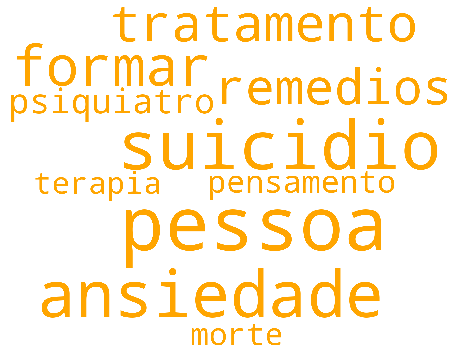

In [11]:
lda_best_model_path = lda_results_by_coherence['path'].tolist()[0]
lda1 = joblib.load(os.path.join(MODELS_PATH, lda_best_model_path))

lda_topics_probs = [topic[:WORDS_PER_TOPIC] for topic in lda1['topics_with_word_probs']]
lda_mapping = get_word_probability_mappings(lda_topics_probs)
for idx, mapping in enumerate(lda_mapping):
    print(f'Tópico {idx+1}: ')
    plot_wordcloud_by_word_probability(lda_mapping[idx], 'orange')

##### Rótulos possíveis para os tópicos:

Tópico 1: <br>
2: relacionamentos<br>
3: vida adulta<br>
4: vida estudantil<br>
5: acompanhamento psiquiátrico<br>

### Resultados de treinamento gerais

Unificando os resultados em CSV avaliados anteriormente, pode-se determinar o modelo com maior valor de coerência dentre todos aqueles treinados (LDA, CTM, ETM).

O modelo LDA com K=5 tópicos foi aquele que teve melhor resultado de coerência.

In [12]:
df_geral = pd.concat([ctm_results, etm_results, lda_results], ignore_index=True)
df_geral.sort_values(["c_npmi_test"], ascending=(False)).head()

,Unnamed: 0,k,model,c_npmi_train,c_npmi_test,diversity,path
22,0,5.0,lda_k5,0.012869,-0.012661,0.510000,lda/lda_k5
11,0,5.0,etm_k5,-0.008190,-0.022510,0.680000,etm/etm_k5
12,1,8.0,etm_k8,0.000802,-0.033373,0.631250,etm/etm_k8
13,2,10.0,etm_k10,0.000798,-0.048735,0.655000,etm/etm_k10
14,3,12.0,etm_k12,-0.000628,-0.051155,0.579167,etm/etm_k12


O gráfico a seguir mostra a variação de coerência nos modelos treinados, conforme aumenta-se o valor de K. Percebe-se que os modelos LDA e ETM tiveram coerência superior aos modelos CTM em todos os cenários produzidos. Além disso, nota-se que o valor de coerência desce nos modelos LDA/ETM à medida que o número de tópicos aumenta. Tal padrão não pode ser inferido aos modelos CTM, que mantém-se com valores de coerência similares mesmo com a alteração de K.

Os resultados visíveis no gráfico condizem com os termos observados nos tópicos dos modelos de melhor resultado em cada um dos três tipos. Enquanto no modelo CTM alguns tópicos parecem se repetir, nos modelos LDA e ETM os tópicos aparecem apenas uma vez. Isso demonstra a melhor qualidade atingida pelos modelos LDA e ETM nos cenários avaliados.

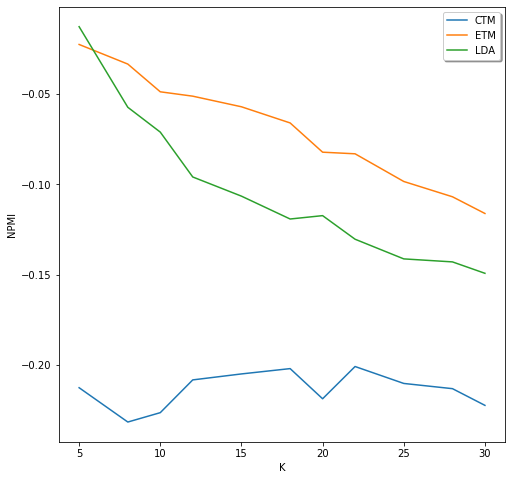

In [13]:
graph_data = [{ 'x': csv['k'], 'y': csv['c_npmi_test'] } for csv in [ctm_results, etm_results, lda_results]]
plot_coherence_by_k_graph(graph_data, ['CTM', 'ETM', 'LDA'])

### Avaliando os vetores de tópicos

A partir dos tópicos obtidos para cada modelo, pode-se utilizar os embeddings word2vec de cada uma das palavras para aproximar um embedding do tópico.

De posse dos embeddings dos tópicos, é possível determinar quais são os termos mais semelhantes a um tópico. Além disso, de posse dos termos semelhantes, pode-se por exemplo determinar as categorias LIWC associadas a tais termos.

Além disso, os vetores de palavras e tópicos podem ser usados para realização da visualização dos tópicos num espaço bidimensional, propiciando uma análise das semelhanças entre diferentes tópicos.

In [14]:
word_lemma_map = json.load(open(WORD_LEMMA_MAPPING, 'r'))
ctm_topics_vectors = get_average_topics_vectors(ctm_topics_probs, word_lemma_map['lemma_word'], ORIGINAL_EMBEDDINGS)
etm_topics_vectors = get_average_topics_vectors(etm_topics_probs, word_lemma_map['lemma_word'], ORIGINAL_EMBEDDINGS)
lda_topics_vectors = get_average_topics_vectors(lda_topics_probs, word_lemma_map['lemma_word'], ORIGINAL_EMBEDDINGS)

#### Quais são os termos dos embeddings mais semelhantes aos vetores dos tópicos?

##### CTM

In [15]:
ctm_topics_similar_words = []
for idx, topic in enumerate(ctm_topics_vectors):
    most_similar = get_most_similar_terms_to_topic(topic, OPTIMIZED_EMBEDDINGS, top_n=3)
    print(f'Tópico {idx+1}: "{most_similar}" são os 3 termos mais similares ao tópico "{", ".join(ctm1["topics"][idx][:WORDS_PER_TOPIC])}"\n\n')
    ctm_topics_similar_words.append(most_similar)

Tópico 1: "[('miguxos', 0.7623012661933899), ('ediçãozinha', 0.7602240443229675), ('viajarei', 0.7586761116981506)]" são os 3 termos mais similares ao tópico "circular, dono, contatos, fichar, amanhar, jogo, conquistar, proprias, dois, gracas"


Tópico 2: "[('discurtir', 0.7595247030258179), ('ridicularizem', 0.7562806606292725), ('regalar', 0.7526349425315857)]" são os 3 termos mais similares ao tópico "circular, dono, bolar, contatos, conquistar, universo, amanhar, proprias, conversar, presenca"


Tópico 3: "[('neodyne', 0.7108307480812073), ('expulsada', 0.6950777173042297), ('varadoiro', 0.6912235617637634)]" são os 3 termos mais similares ao tópico "empregar, dono, trabalhar, vago, aluguel, faculdade, entrevisto, dinheiro, lugar, chefe"


Tópico 4: "[('comçou', 0.7305599451065063), ('rockacademie', 0.7166354656219482), ('marçano', 0.7064554691314697)]" são os 3 termos mais similares ao tópico "vidar, problema, faculdade, carreira, dinheiro, estagiar, tempo, cursar, area, oportunid

##### ETM

In [16]:
etm_topics_similar_words = []
for idx, topic in enumerate(etm_topics_vectors):
    most_similar = get_most_similar_terms_to_topic(topic, OPTIMIZED_EMBEDDINGS, top_n=3)
    print(f'Tópico {idx+1}: "{most_similar}" são os 3 termos mais similares ao tópico "{", ".join(etm1["topics"][idx][:WORDS_PER_TOPIC])}"\n\n')
    etm_topics_similar_words.append(most_similar)

Tópico 1: "[('vidar', 0.783325731754303), ('sæhrímnir', 0.6981912851333618), ('latia', 0.6981425881385803)]" são os 3 termos mais similares ao tópico "vidar, horar, semana, mundo, caro, vezar, cidade, familia, lugar, merda"


Tópico 2: "[('pessoa', 0.7465170621871948), ('monossexual', 0.7203599810600281), ('aprofundação', 0.7134661078453064)]" são os 3 termos mais similares ao tópico "pessoa, tipo, partir, mundo, relacao, dinheiro, mulher, homem, maioria, idear"


Tópico 3: "[('bafáfá', 0.7520774602890015), ('coisa', 0.732789158821106), ('demorarei', 0.7326593399047852)]" são os 3 termos mais similares ao tópico "tempo, coisa, amigo, casar, gente, entao, namorar, momento, relacionamento, contar"


Tópico 4: "[('coisa', 0.7790070176124573), ('pessoa', 0.7579401731491089), ('refrência', 0.746723473072052)]" são os 3 termos mais similares ao tópico "pessoa, problema, coisa, vezar, ansiedade, medo, sentir, amigar, atar, vontade"


Tópico 5: "[('deteriorarem', 0.722797691822052), ('latowidg

##### LDA

In [17]:
lda_topics_similar_words = []
for idx, topic in enumerate(lda_topics_vectors):
    most_similar = get_most_similar_terms_to_topic(topic, OPTIMIZED_EMBEDDINGS, top_n=3)
    print(f'Tópico {idx+1}: "{most_similar}" são os 3 termos mais similares ao tópico "{", ".join(lda1["topics"][idx][:WORDS_PER_TOPIC])}"\n\n')
    lda_topics_similar_words.append(most_similar)

Tópico 1: "[('amigo', 0.7387269735336304), ('rapaz', 0.7347504496574402), ('menino', 0.7084633708000183)]" são os 3 termos mais similares ao tópico "mulher, homem, menino, escola, amigo, tempo, amigar, epoca, sala, namorar"


Tópico 2: "[('coisa', 0.7970680594444275), ('bafáfá', 0.7593364715576172), ('pesssoa', 0.75506991147995)]" são os 3 termos mais similares ao tópico "pessoa, coisa, vidar, amigo, tempo, casar, gente, vezar, problema, entao"


Tópico 3: "[('apequenar', 0.7560683488845825), ('dionisofonto', 0.7511836290359497), ('pirgopolinices', 0.7510894536972046)]" são os 3 termos mais similares ao tópico "vidar, coisa, casar, pessoa, problema, tempo, familia, trabalhar, empregar, dinheiro"


Tópico 4: "[('escola', 0.7653557062149048), ('faculdade', 0.7644808888435364), ('cursar', 0.7510625123977661)]" são os 3 termos mais similares ao tópico "cursar, escola, aula, partir, faculdade, provar, professorar, ensinar, noto, sociedade"


Tópico 5: "[('hebefrênica', 0.7694511413574219), 

#### Qual é a categoria LIWC do termo mais semelhante a cada tópico?

##### CTM

In [18]:
for idx, _ in enumerate(ctm_topics_vectors):
    most_similar = ctm_topics_similar_words[idx][0]
    word_categories = get_categories_for_word(most_similar[0][0], LIWC_DICTIONARY)
    print(f'Tópico {idx+1} - Categorias LIWC associadas ao termo similar "{most_similar[0]}": {word_categories}')

Tópico 1 - Categorias LIWC associadas ao termo similar "miguxos": []
Tópico 2 - Categorias LIWC associadas ao termo similar "discurtir": []
Tópico 3 - Categorias LIWC associadas ao termo similar "neodyne": []
Tópico 4 - Categorias LIWC associadas ao termo similar "comçou": []
Tópico 5 - Categorias LIWC associadas ao termo similar "sexofobia": []
Tópico 6 - Categorias LIWC associadas ao termo similar "filofobia": []
Tópico 7 - Categorias LIWC associadas ao termo similar "condiga": []
Tópico 8 - Categorias LIWC associadas ao termo similar "apressadinho": ['funct', 'pronoun', 'ppron', 'you', 'shehe', 'ipron', 'article', 'preps', 'social', 'cogmech', 'incl', 'space', 'nonfl']
Tópico 9 - Categorias LIWC associadas ao termo similar "aprofundação": ['funct', 'pronoun', 'ppron', 'you', 'shehe', 'ipron', 'article', 'preps', 'social', 'cogmech', 'incl', 'space', 'nonfl']
Tópico 10 - Categorias LIWC associadas ao termo similar "apedreja": ['funct', 'pronoun', 'ppron', 'you', 'shehe', 'ipron', 'ar

##### ETM

In [19]:
for idx, _ in enumerate(etm_topics_vectors):
    most_similar = etm_topics_similar_words[idx][0]
    word_categories = get_categories_for_word(most_similar[0][0], LIWC_DICTIONARY)
    print(f'Tópico {idx+1} - Categorias LIWC associadas ao termo similar "{most_similar[0]}": {word_categories}')

Tópico 1 - Categorias LIWC associadas ao termo similar "vidar": []
Tópico 2 - Categorias LIWC associadas ao termo similar "pessoa": []
Tópico 3 - Categorias LIWC associadas ao termo similar "bafáfá": []
Tópico 4 - Categorias LIWC associadas ao termo similar "coisa": []
Tópico 5 - Categorias LIWC associadas ao termo similar "deteriorarem": []


##### LDA

In [20]:
for idx, _ in enumerate(lda_topics_vectors):
    most_similar = lda_topics_similar_words[idx][0]
    word_categories = get_categories_for_word(most_similar[0][0], LIWC_DICTIONARY)
    print(f'Tópico {idx+1} - Categorias LIWC associadas ao termo similar "{most_similar[0]}": {word_categories}')

Tópico 1 - Categorias LIWC associadas ao termo similar "amigo": ['funct', 'pronoun', 'ppron', 'you', 'shehe', 'ipron', 'article', 'preps', 'social', 'cogmech', 'incl', 'space', 'nonfl']
Tópico 2 - Categorias LIWC associadas ao termo similar "coisa": []
Tópico 3 - Categorias LIWC associadas ao termo similar "apequenar": ['funct', 'pronoun', 'ppron', 'you', 'shehe', 'ipron', 'article', 'preps', 'social', 'cogmech', 'incl', 'space', 'nonfl']
Tópico 4 - Categorias LIWC associadas ao termo similar "escola": ['funct', 'conj', 'cogmech', 'incl']
Tópico 5 - Categorias LIWC associadas ao termo similar "hebefrênica": []
